<p style="font-size:150%"> Оценка внутреннего коэффициента воспроизводства. Решение нелинейного уравнения </p>

R = 113.48499999999997


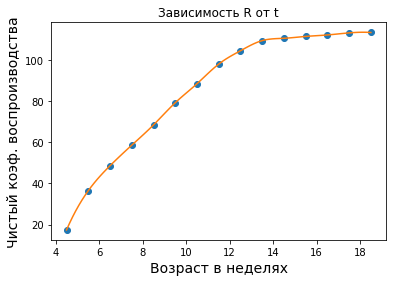

In [53]:
import numpy as np
from scipy import optimize
import scipy.interpolate as inter
import matplotlib.pyplot as plt

t=np.arange(4.5,19.5,1).tolist()
l_t=[0.87,0.83,0.81,0.8,0.79,0.77,0.74,0.66,0.59,0.52,0.45,0.36,0.29,0.25,0.19]
m_t=[20.0,23.0,15.0,12.5,12.5,14.0,12.5,14.5,11.0,9.5,2.5,2.5,2.5,4.0,1.0]

y=[]
for i in range(len(t)):
    y.append(l_t[i]*m_t[i])
R=sum(y)
for i in range(len(y)-1):
    y[i+1]+=y[i]
t1 = np.linspace(4.5,18.5,100)
interFunc = inter.interp1d(t, y, kind=3)
plt.title('Зависимость R от t')
plt.xlabel("Возраст в неделях", fontsize=14)
plt.ylabel("Чистый коэф. воспроизводства", fontsize=14)
plt.plot(t, y, 'o', t1, interFunc(t1))
print("R =", R)

 ### Внутренний коэффициент естественной репродукции r

In [54]:
def f(x):
    S = 0
    for i in range(len(t)):
        S += np.exp(-x*t[i])*l_t[i]*m_t[i]
    return S - 1

r = optimize.brentq(f,-10,10)
print("r =",r)

r = 0.7619840766980146


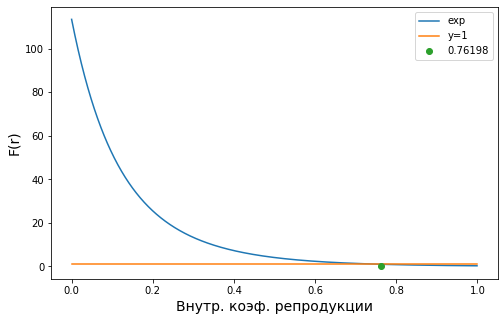

In [55]:
func=[]
N1=0
N2=1
rlist=np.arange(N1, N2,0.001).tolist()
for i in rlist:
    func.append(f(i)+1)

x=[N1,N2]
y=[1,1]

fig, ax = plt.subplots()

ax.plot(rlist, func, label = 'exp')
ax.plot(x,y, label = 'y=1')
ax.plot(r,f(r),'o', label = '0.76198')

ax.legend()

fig.set_figheight(5)
fig.set_figwidth(8)
plt.xlabel("Внутр. коэф. репродукции", fontsize=14)
plt.ylabel("F(r)", fontsize=14)

plt.show()

$\exp (-rt) = \frac{N0}{N}$ Отсюда очевидно соотношение $\frac{R*N0}{N} = 1$ откуда и следует получившаяся формула